In [5]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)


while 1:
    ret, img = cap.read()
    
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    
    ret,thresh = cv2.threshold(imgray,100,255,0)

    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    
     
 
    
    #st1 = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21), (10, 10))
    #st2 = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11), (5, 5))
    #thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, st1) 
    #thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, st2) 
    
    #thresh = cv2.GaussianBlur(thresh, (5, 5), 2)
    
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    
    cnt = contours
    cv2.drawContours(img,cnt,-1,(0,250,0),2)
    
    
    
    
    if len(contours) > 0:
        cnt = contours[(len(contours)-1)]
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img,(x-25,y-25),(x+w+25,y+h+25),(155,155,0),1)
        
    


        
    cv2.imshow('img', img)
    cv2.imshow('Thresh', thresh)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
img = cv2.imread("image.jpg")
crop_img = img[0:900, 0:950] # Crop from x, y, w, h -> 100, 200, 300, 400
# NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

255

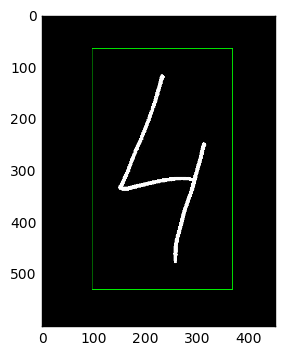

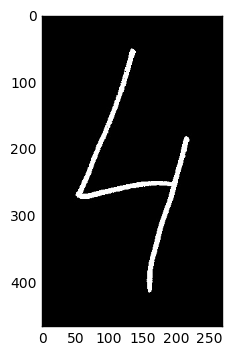

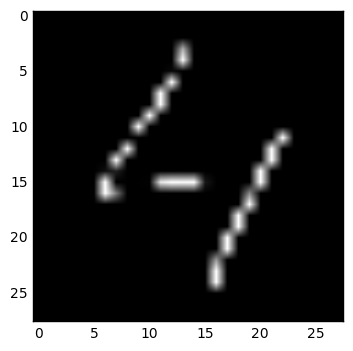

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('out.jpg')

imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(im,(x-50,y-50),(x+w+50,y+h+50),(0,255,0),1)

# Обрезаем по рамке
crop_img = im[y-50: y + h + 50, x - 50: x + w + 50] # Crop from x, y, w, h -> 100, 200, 300, 400
# NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]


# Изменяем размер на 28*28
res = cv2.resize(crop_img,(28, 28))


plt.imshow(im, cmap='gray')
plt.show()
plt.imshow(crop_img, cmap='gray')
plt.show()
plt.imshow(res, cmap='gray')
plt.show()